<a href="https://colab.research.google.com/github/AyushiKashyapp/NLP/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

Application of NLP, computational linguistics, and text analysis to identify and classify subjective opinions in source documents.

Aims to determine writer's attitude towards a topic or the overall contextual polarity of a document.

Sentiment Analysis is used to identify opinion words, which are indicator of feelings and polarity. These can be divide into two types: positive words and negative words.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
from google.colab import files
uploaded = files.upload()


In [6]:
data = pd.read_csv('Train.csv', encoding = 'unicode_escape')
data.head()

,ï»¿text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [9]:
data.rename(columns={'ï»¿text': 'text'}, inplace=True)

Visualizing the distribution of data.

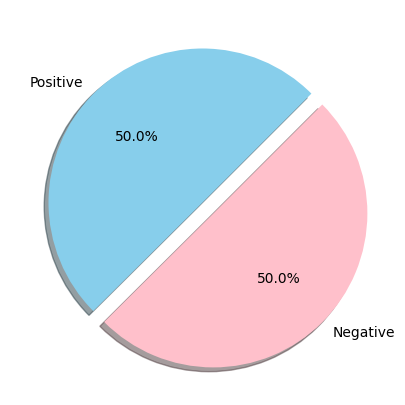

In [7]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue", "pink"]
pos = data[data['label']==1]
neg = data[data['label']==0]
ck = [pos['label'].count(), neg['label'].count()]
legpie = plt.pie(ck, labels = ["Positive", "Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

Removing html tags using re by replacing them with an empty string.

In [10]:
import re

def preprocessor(text):
  text = re.sub('<[^>]*>','',text)
  emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
  text=re.sub('[\W]+',' ',text.lower()) +\
   ' '.join(emojis).replace('-','')
  return text

data['text']=data['text'].apply(preprocessor)

Visualizing the negative and positive words in a WordCloud.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Positive Words: 


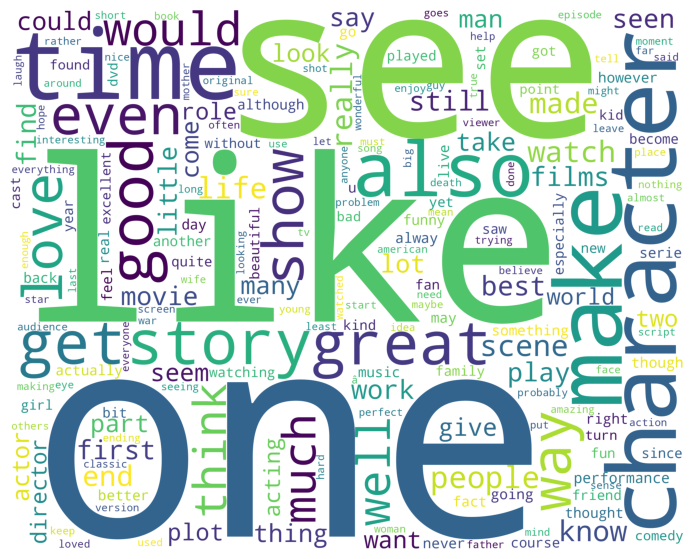

Negative Words: 


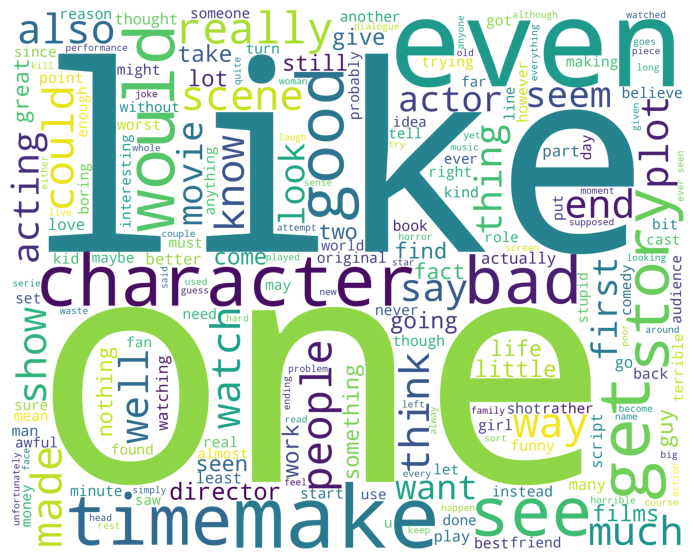

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[data['label']==1]
positivedata = positivedata['text']
negativedata = data[data['label']==0]
negativedata = negativedata['text']

def wordcloud_draw(data, color='white'):
  words = ' '.join(data)
  cleaned_word = " ".join([word for word in words.split()
                              if (word!='movie' and word!='film')
                              ])
  wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
  plt.figure(1,figsize=(10, 7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()


print("Positive Words: ")
wordcloud_draw(positivedata, 'white')
print("Negative Words: ")
wordcloud_draw(negativedata)

Using TF IDF Vectorizer to convert the raw documents into feature matrix to train the Machine Learning model.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in word_tokenize(text)]

tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Training Machine Learning Model.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  4.0min finished


Accuracy:  0.8908
